In [23]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [24]:
train_df = pd.read_csv('Downloads/titanic/train.csv')
test_df = pd.read_csv('Downloads/titanic/train.csv')

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train_df = train_df.loc[train_df.Fare < 512,:]

In [28]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,888,888,888,202,886
unique,888,2,680,146,3
top,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",male,CA. 2343,C23 C25 C27,S
freq,1,575,7,4,644


In [29]:
#drop irrevelent features
train_df = train_df.drop(['PassengerId','Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [30]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Name      888 non-null    object 
 3   Sex       888 non-null    object 
 4   Age       711 non-null    float64
 5   SibSp     888 non-null    int64  
 6   Parch     888 non-null    int64  
 7   Fare      888 non-null    float64
 8   Embarked  886 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.4+ KB


In [32]:
#label encoder for categorical features
Sex_label_encoder = LabelEncoder()
train_df["Sex"] = Sex_label_encoder.fit_transform(train_df.Sex)
test_df["Sex"] = Sex_label_encoder.fit_transform(test_df.Sex)

In [33]:
for dataset in combine:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].dropna().median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].dropna().mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace = True)

In [34]:
label = LabelEncoder()
for dataset in combine:    
    dataset['Sex'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked'] = label.fit_transform(dataset['Embarked'])

In [35]:
test_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.00,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.00,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.45,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.00,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,7.75,1


In [37]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [38]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


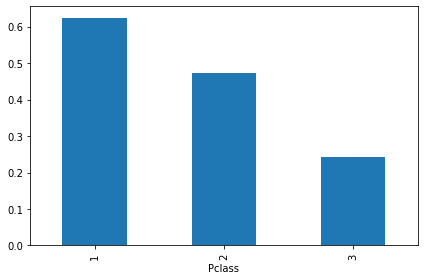

In [39]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

#find distribution of survival rate among classes
train_df.groupby(['Pclass'])['Survived'].mean().plot.bar()
plt.show()

In [40]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.741214
1,1,0.186087


In [41]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.342149
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


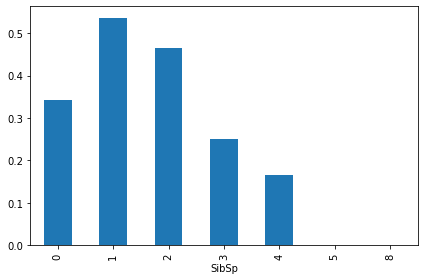

In [42]:
train_df.groupby(['SibSp'])['Survived'].mean().plot.bar()
plt.show()

In [43]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.547009
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


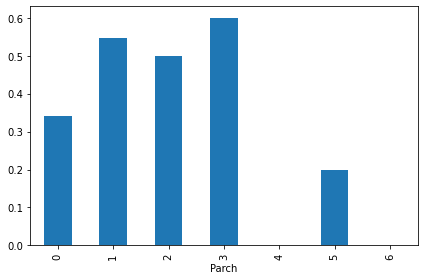

In [44]:
train_df.groupby(['Parch'])['Survived'].mean().plot.bar()
plt.show()

In [45]:
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,0,0.545455
1,1,0.389610
2,2,0.339009


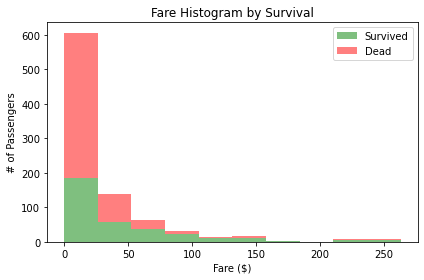

In [75]:
plt.hist(x = [train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'], alpha = 0.5)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

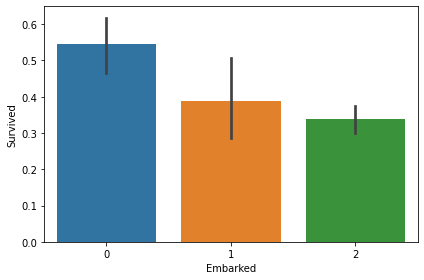

In [77]:
sns.barplot(x = 'Embarked', y = 'Survived', data=train_df)

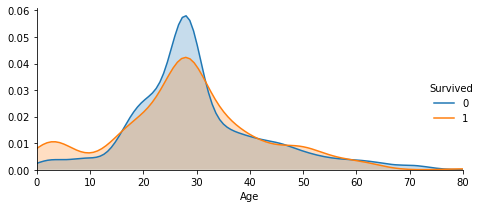

In [69]:
#g = sns.FacetGrid(train_df, col='Survived')
#g.map(plt.hist, 'Age', bins=30)
a = sns.FacetGrid( train_df, hue = 'Survived', aspect=2 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train_df['Age'].max()))
a.add_legend()

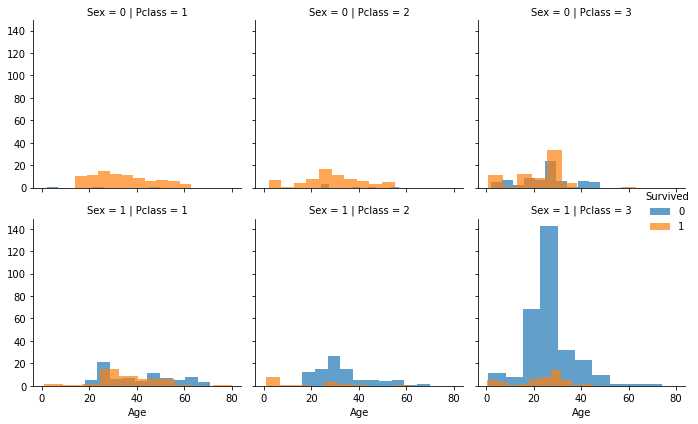

In [72]:
h = sns.FacetGrid(train_df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .7)
h.add_legend()

In [48]:
Target = ['Survived']

#define x variables for original features aka feature selection
Other = ['Sex','Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(train_df[Other], train_df[Target], test_size=0.3, random_state=0)

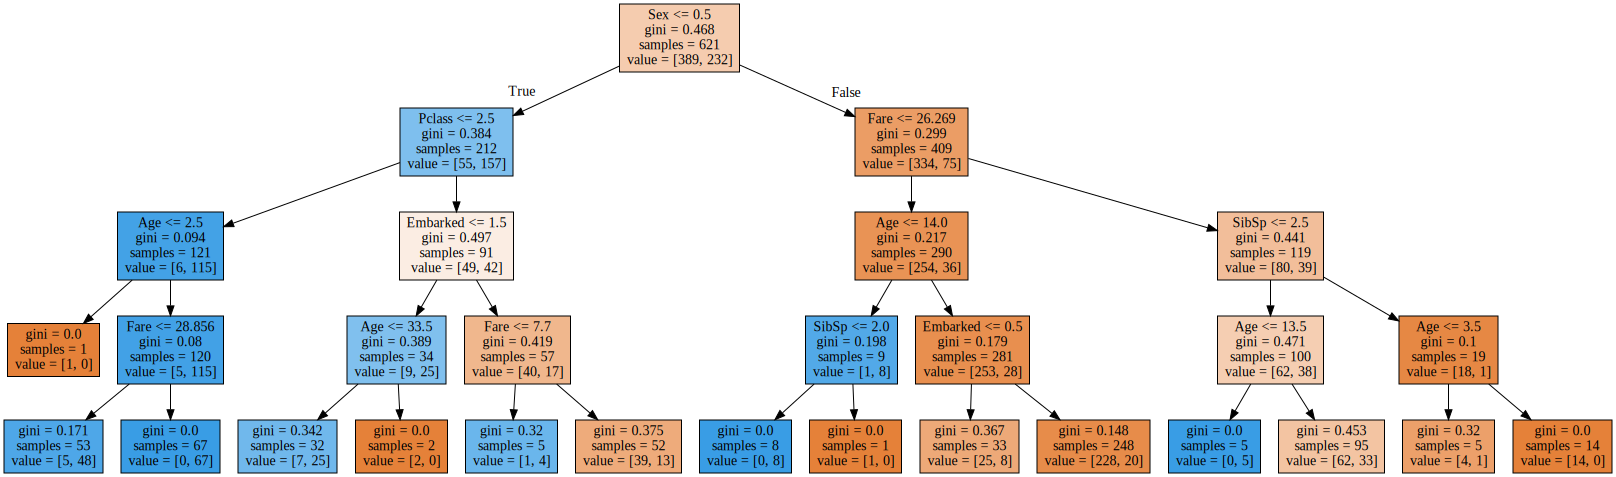

In [53]:
#build decision tree to find predictors for surcical rate
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
dot_data = export_graphviz(dt, out_file=None, 
                                feature_names=X_train.columns,  
                                #class_names=ytrain.columns,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [54]:
pd.Series(dt.feature_importances_,index = X_train.columns).sort_values(ascending=False)

Sex         0.555788
Pclass      0.159154
Age         0.123885
Fare        0.065909
Embarked    0.061929
SibSp       0.033335
Parch       0.000000
dtype: float64

In [100]:
#test_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,1,27.0,0,0,13.00,0
887,888,1,1,0,19.0,0,0,30.00,0
888,889,0,3,0,29.0,1,2,23.45,0
889,890,1,1,1,26.0,0,0,30.00,1
890,891,0,3,1,32.0,0,0,7.75,2


In [101]:
#Xtrain = test_df.loc[:,test_df.columns != 'Survived']
#ytrain = test_df.loc[:,'Survived']

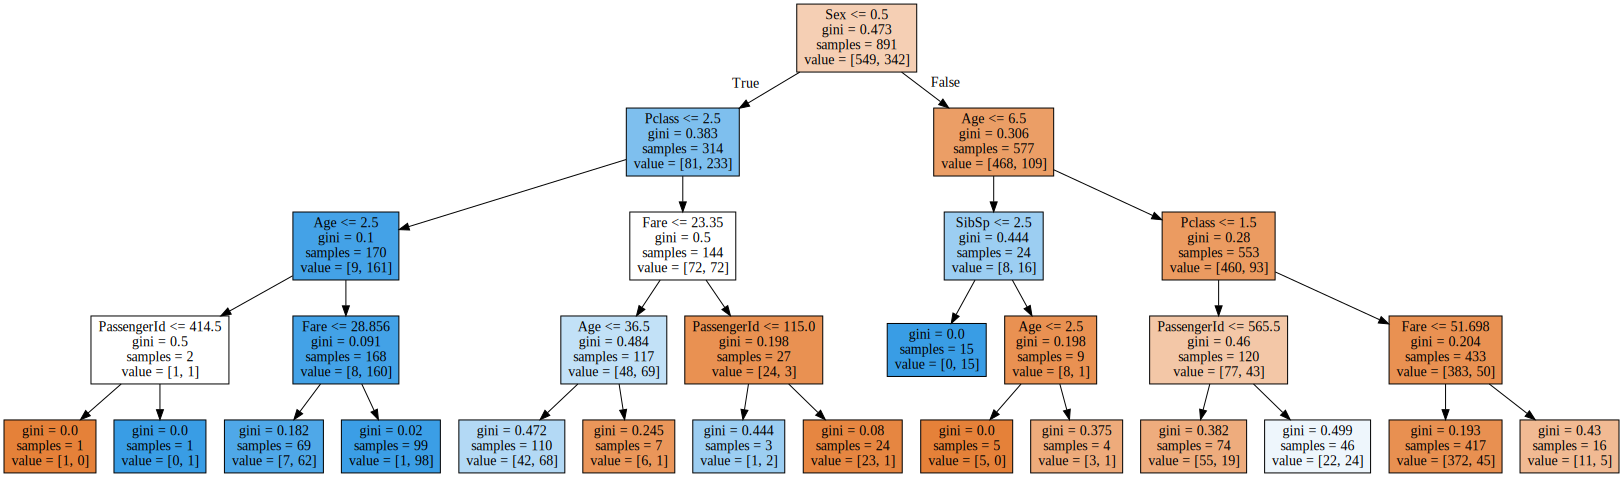

In [102]:
#dt = DecisionTreeClassifier(max_depth=4)
#dt.fit(Xtrain,ytrain)
#dot_data = export_graphviz(dt, out_file=None, 
                                #feature_names=Xtrain.columns,  
                                #(class_names=ytrain.columns,)
                                #filled=True)
#graph = graphviz.Source(dot_data, format="png") 
#graph

In [103]:
#pd.Series(dt.feature_importances_,index = Xtrain.columns).sort_values(ascending=False)

Sex            0.592109
Pclass         0.201041
Age            0.073723
Fare           0.057199
SibSp          0.042300
PassengerId    0.033629
Embarked       0.000000
Parch          0.000000
dtype: float64